In [1]:
import numpy as np
import gym
import time 
from gym import spaces
import matplotlib.pyplot as plt
from env import RegEnv
from Agents import QLearning, DQN
from IPython.display import display, clear_output
import torch
import torch.nn as nn

In [2]:
lr = 0.1
env = RegEnv(lr=lr)

In [3]:
decay = True
alpha = 0.3
gamma = 0.7
epsilon = 1
episodes = 50000
disc_factor = 0.15
discount = 1-1/(episodes*disc_factor)
def adaptive(self, episode):
    self.epsilon = max(0.01, min(1.0, self.epsilon*discount))

In [4]:
OBSERVATION_DIMS = env.observation_space.shape[0]
LOWER = env.observation_space.low
HIGHER = env.observation_space.high

RESOLUTIONS = list(((HIGHER-LOWER)/lr).astype('int'))
ALL_POSSIBLE_STATES = np.array(np.meshgrid(
    *[range(res) for res in RESOLUTIONS])).T.reshape(-1, OBSERVATION_DIMS)
STATE_SPACE = {tuple(j): i for i, j in enumerate(ALL_POSSIBLE_STATES)}

In [5]:
def discretize(state):
    for i in range(OBSERVATION_DIMS):
        state[i] = np.digitize(state[i],
                               np.linspace(LOWER[i],
                                           HIGHER[i],
                                           RESOLUTIONS[i]-1))
    return STATE_SPACE[tuple(state.astype(int))]

In [24]:
#model = QLearning(alpha, gamma, epsilon, adaptive=None, discretize=discretize, double=True, verbose=True)
#model.load('weights_50000_0.3_0.7_True_0.15.npy')
model = DQN(env, alpha, gamma, epsilon, adaptive = adaptive)
model.Q_net.load_state_dict(torch.load('weights_30000_0.001_0.99_128_True_0.35.pt'))

<All keys matched successfully>

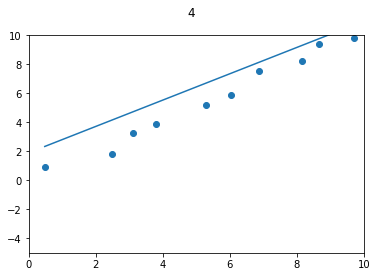

In [25]:
state = env.reset()
done = False
while not done:
    action = model.predict(state)
    state, reward, done, _ = env.step(action)
    fig = env.render()
    fig.suptitle(action)
    display(fig)
    time.sleep(0.2)
    clear_output(wait=True)